In [45]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
import re
from nltk.corpus import stopwords


In [46]:
# downloading stopwords from nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
# loading dataset
data = pd.read_csv(r"C:\Users\LENOVO\Downloads\archive\IMDB Dataset.csv")
data.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [49]:
# checking data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [50]:
# cleaning text data
def clean_text(text):
    text = re.sub('<.*?>', '', text)   # to remove html tags
    text = re.sub('[^a-zA-Z]', ' ', text)  # to keep only alphabets
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    return " ".join(text)

data['cleaned_review'] = data['review'].apply(clean_text)


In [51]:
# checking cleaned reviews
data.head()


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [52]:
# encoding sentiment column
data['sentiment'] = data['sentiment'].map({'positive':1, 'negative':0})


In [53]:
# splitting data into train and test
X = data['cleaned_review']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
# converting text data into numerical form
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [55]:
# model training using Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [56]:
# predictions
y_pred = model.predict(X_test_vec)


In [57]:
# checking accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8553

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.86      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



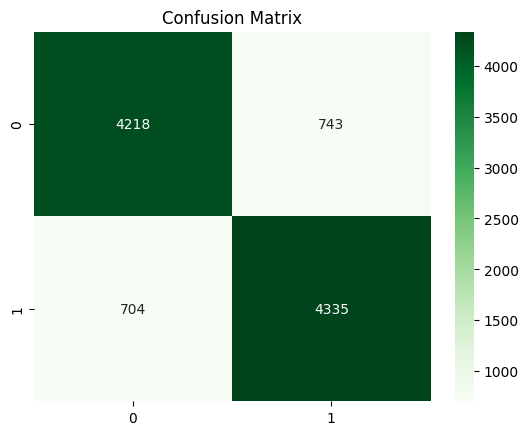

In [58]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.show()


In [59]:
# testing with custom reviews
sample = ["The movie was amazing, loved the acting and story!"]
sample_vec = vectorizer.transform(sample)
pred = model.predict(sample_vec)

# printing review with its prediction
for i in range(len(sample)):
    if pred[i] == 1:
        sentiment = "Positive"
    else:
        sentiment = "Negative"
    
    print("Review:", sample[i])
    print("Prediction:", sentiment)


Review: The movie was amazing, loved the acting and story!
Prediction: Positive
